The lack of high quality annotated data was a bottleneck throughout our project, so we used prompt learning for data augmentation to improve model quality.

In [ ]:
try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    COLAB = True
    print("Note: using Google CoLab")
    %tensorflow_version 2.x
except:
    print("Note: not using Google CoLab")
    COLAB = False

Mounted at /content/drive
Note: using Google CoLab
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()
!/opt/bin/nvidia-smi

Fri Apr  7 13:25:34 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    25W /  70W |    373MiB / 15360MiB |      1%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install bert_score

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 KB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 56.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 108.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 KB 26.0 MB/s eta 0:00:00


In [ ]:
# check installation
import bert_score
bert_score.__version__

'0.3.12'

In [ ]:
# hide the loading messages
import logging
import transformers
import numpy as np
import pandas as pd
import torch
transformers.tokenization_utils.logger.setLevel(logging.ERROR)
transformers.configuration_utils.logger.setLevel(logging.ERROR)
transformers.modeling_utils.logger.setLevel(logging.ERROR)

In [ ]:
from bert_score import BERTScorer
#checkpoint = "bleurt/test_checkpoint"
scorer = BERTScorer(lang="en", rescale_with_baseline=True)

In [ ]:
!pip install --upgrade pip  # ensures that pip is current
!git clone https://github.com/google-research/bleurt.git
!pip install ./bleurt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 22.9 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 22.0.4
    Uninstalling pip-22.0.4:
      Successfully uninstalled pip-22.0.4
Cloning into 'bleurt'...
remote: Enumerating objects: 134, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 134 (delta 0), reused 17 (delta 0), pack-reused 116
Receiving objects: 100% (134/134), 31.28 MiB | 12.39 MiB/s, done.
Resolving deltas: 100% (49/49), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing ./bleurt
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 17.8 MB/s eta 0:00:00
  Created wheel for BLEURT: filename=BLEURT-0.0.2-py3-none-any.whl size=16456781 sha256=afd0e708ec7acb19af0dfe

In [ ]:
import json
from tqdm import tqdm
import math

In [ ]:
import bleurt
from bleurt import score as bleurt_score
import sys
sys.argv = sys.argv[:1] ##thanks https://github.com/google-research/bleurt/issues/4

In [ ]:
!curl -o bleurt-20.zip https://storage.googleapis.com/bleurt-oss-21/BLEURT-20.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 2041M  100 2041M    0     0  70.9M      0  0:00:28  0:00:28 --:--:-- 66.8M


In [ ]:
!unzip bleurt-20.zip

Archive:  bleurt-20.zip
   creating: BLEURT-20/
  inflating: BLEURT-20/bert_config.json  
  inflating: BLEURT-20/saved_model.pb  
   creating: BLEURT-20/variables/
  inflating: BLEURT-20/variables/variables.index  
  inflating: BLEURT-20/variables/variables.data-00000-of-00001  
  inflating: BLEURT-20/sent_piece.vocab  
  inflating: BLEURT-20/bleurt_config.json  
  inflating: BLEURT-20/sent_piece.model  


In [ ]:
from bleurt import score
checkpoint = "BLEURT-20" # A new pre-trained checkpoint

# Load data

Here is the postprocess of the generated data 

In [ ]:
data_path ="/content/drive/MyDrive/BioNLP-2023/bionlp-workshop-2023-shared-task-1a-problem-list-summarization-1.0.0/"

In [ ]:
data = []

for i in range(1, 13):
    filename = data_path + f"sharedtask1a_{i}_dg.jsonl"
    with open(filename, "r") as f:
        for line in f:
            data.append(json.loads(line))

In [ ]:
data = []
filename = data_path + "sharedtask1a_processed_dg_withoutmeta.jsonl"
with open(filename, "r") as f:
        for line in f:
            data.append(json.loads(line))

In [ ]:
len(data)

7623

Text a: example data 

Text b: generated data based on taxt a

In [ ]:
data[500]

{'text_a': '68 year old male with history of type II DM, HTN, atrial fibrillation\\n   on coumadin, s/p two vessel CABG in  [Reg#]  and s/p nephrectomy admitted\\n   to the CCU for evaluation of dyspnea following diagnostic cath.',
 'text_b': 'A 68 year old male with history of type II DM, HTN, atrial fibrillation, s/p two vessel CABG, nephrectomy, admitted to the CCU',
 'label': '1'}

# Filtering data

In order to score the quality of the data, we need to separate and correspond the reference sentences and the candidates.

In [ ]:
reference_sentence = []
candidate_sentence = []
for sent in data:
    if sent["label"] == "1":
        reference_sentence.append(sent["text_a"])
        candidate_sentence.append(sent["text_b"])

In [ ]:
reference_sentence[:5]

['H/O HYPERKALEMIA (HIGH POTASSIUM, HYPERPOTASSEMIA)\\n .H/O HYPERGLYCEMIA\\n CHRONIC OBSTRUCTIVE PULMONARY DISEASE (COPD, BRONCHITIS, EMPHYSEMA)\\n   WITH ACUTE EXACERBATION\\n   A 59 year-old man presents with malaise and hypoxia',
 'H/O HYPERKALEMIA (HIGH POTASSIUM, HYPERPOTASSEMIA)\\n .H/O HYPERGLYCEMIA\\n CHRONIC OBSTRUCTIVE PULMONARY DISEASE (COPD, BRONCHITIS, EMPHYSEMA)\\n   WITH ACUTE EXACERBATION\\n   A 59 year-old man presents with malaise and hypoxia',
 'H/O HYPERKALEMIA (HIGH POTASSIUM, HYPERPOTASSEMIA)\\n .H/O HYPERGLYCEMIA\\n CHRONIC OBSTRUCTIVE PULMONARY DISEASE (COPD, BRONCHITIS, EMPHYSEMA)\\n   WITH ACUTE EXACERBATION\\n   A 59 year-old man presents with malaise and hypoxia',
 'H/O HYPERKALEMIA (HIGH POTASSIUM, HYPERPOTASSEMIA)\\n .H/O HYPERGLYCEMIA\\n CHRONIC OBSTRUCTIVE PULMONARY DISEASE (COPD, BRONCHITIS, EMPHYSEMA)\\n   WITH ACUTE EXACERBATION\\n   A 59 year-old man presents with malaise and hypoxia',
 'H/O HYPERKALEMIA (HIGH POTASSIUM, HYPERPOTASSEMIA)\\n .H/O HYP

In [ ]:
candidate_sentence[:5]

['H/O HYPERKALEMIA (HIGH POTASSIUM, HYPERPOTASSEMIA)\\n.H/O HYPERGLYCEMIA\\n CHRON',
 'H/O HYPERKALEMIA\\n H/O HYPERGLYCEMIA\\n CHRONIC OBSTRUCTIVE PULMONARY DISEASE (COPD,',
 'H/O HYPERKALEMIA (HIGH POTASSIUM, HYPERPOTASSEMIA)\\n.H/O HYPERGLYCEMIA\\n CHRON',
 'A 59 year-old man presents with malaise and hypoxia',
 'A 59-year-old man presents with malaise and hypoxia']

In [ ]:
dg_data = pd.DataFrame({"candidate": candidate_sentence, "reference":reference_sentence})

In [ ]:
dg_data

,candidate,reference
0,"H/O HYPERKALEMIA (HIGH POTASSIUM, HYPERPOTASSE...","H/O HYPERKALEMIA (HIGH POTASSIUM, HYPERPOTASSE..."
1,H/O HYPERKALEMIA\n H/O HYPERGLYCEMIA\n CHRONIC...,"H/O HYPERKALEMIA (HIGH POTASSIUM, HYPERPOTASSE..."
2,"H/O HYPERKALEMIA (HIGH POTASSIUM, HYPERPOTASSE...","H/O HYPERKALEMIA (HIGH POTASSIUM, HYPERPOTASSE..."
3,A 59 year-old man presents with malaise and hy...,"H/O HYPERKALEMIA (HIGH POTASSIUM, HYPERPOTASSE..."
4,A 59-year-old man presents with malaise and hy...,"H/O HYPERKALEMIA (HIGH POTASSIUM, HYPERPOTASSE..."
...,...,...
7618,I was the patient's primary care physician for...,"58M h/o COPD, HCV, polysubstance abuse admitte..."
7619,"58M h/o COPD, HCV, polysubstance abuse admitte...","58M h/o COPD, HCV, polysubstance abuse admitte..."
7620,The patient was admitted to the ICU for EtOH\n...,"58M h/o COPD, HCV, polysubstance abuse admitte..."
7621,"58M h/o COPD, HCV, polysubstance abuse admitte...","58M h/o COPD, HCV, polysubstance abuse admitte..."


First, we remove the generated sentence that is less than 3 in length and duplicates.

In [ ]:
dg_data = dg_data[dg_data['candidate'].str.len() > 2]
dg_data

,candidate,reference
0,"H/O HYPERKALEMIA (HIGH POTASSIUM, HYPERPOTASSE...","H/O HYPERKALEMIA (HIGH POTASSIUM, HYPERPOTASSE..."
1,H/O HYPERKALEMIA\n H/O HYPERGLYCEMIA\n CHRONIC...,"H/O HYPERKALEMIA (HIGH POTASSIUM, HYPERPOTASSE..."
2,"H/O HYPERKALEMIA (HIGH POTASSIUM, HYPERPOTASSE...","H/O HYPERKALEMIA (HIGH POTASSIUM, HYPERPOTASSE..."
3,A 59 year-old man presents with malaise and hy...,"H/O HYPERKALEMIA (HIGH POTASSIUM, HYPERPOTASSE..."
4,A 59-year-old man presents with malaise and hy...,"H/O HYPERKALEMIA (HIGH POTASSIUM, HYPERPOTASSE..."
...,...,...
7618,I was the patient's primary care physician for...,"58M h/o COPD, HCV, polysubstance abuse admitte..."
7619,"58M h/o COPD, HCV, polysubstance abuse admitte...","58M h/o COPD, HCV, polysubstance abuse admitte..."
7620,The patient was admitted to the ICU for EtOH\n...,"58M h/o COPD, HCV, polysubstance abuse admitte..."
7621,"58M h/o COPD, HCV, polysubstance abuse admitte...","58M h/o COPD, HCV, polysubstance abuse admitte..."


In [ ]:
#remove the duplicate and remain the order for compare the candidate-referencde pair
dg_data.drop_duplicates(inplace = True)
dg_data = dg_data.reset_index(drop = True)
dg_data

<ipython-input-26-f71cb4ba0a52>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dg_data.drop_duplicates(inplace = True)


,candidate,reference
0,"H/O HYPERKALEMIA (HIGH POTASSIUM, HYPERPOTASSE...","H/O HYPERKALEMIA (HIGH POTASSIUM, HYPERPOTASSE..."
1,H/O HYPERKALEMIA\n H/O HYPERGLYCEMIA\n CHRONIC...,"H/O HYPERKALEMIA (HIGH POTASSIUM, HYPERPOTASSE..."
2,A 59 year-old man presents with malaise and hy...,"H/O HYPERKALEMIA (HIGH POTASSIUM, HYPERPOTASSE..."
3,A 59-year-old man presents with malaise and hy...,"H/O HYPERKALEMIA (HIGH POTASSIUM, HYPERPOTASSE..."
4,H/O HYPERKALEMIA\n CHRONIC OBSTRUCTIVE PU...,"H/O HYPERKALEMIA (HIGH POTASSIUM, HYPERPOTASSE..."
...,...,...
5438,"I'm a cop, I have to make arrests.","58M h/o COPD, HCV, polysubstance abuse admitte..."
5439,The first sentence describes a patient's condi...,"58M h/o COPD, HCV, polysubstance abuse admitte..."
5440,"I'm a 58M h/o COPD, HCV, polysubstance abuse a...","58M h/o COPD, HCV, polysubstance abuse admitte..."
5441,I was the patient's primary care physician for...,"58M h/o COPD, HCV, polysubstance abuse admitte..."


Second, we filtered the quality of the sentences using BLEURT and BERT Score.

In [ ]:
def calculatingScore (references, candidates):
    #Calculating the candidates-references pair score
    scorer = score.BleurtScorer(checkpoint)
    scores = tqdm(scorer.score(references=references, candidates=candidates))
    return scores

In [ ]:
references = dg_data["reference"].tolist()
candidates = dg_data["candidate"].tolist()

In [ ]:
def optimisticMatching_bleurt(references, candidates):
    #For each generated keypoint, calculating the score between the generated keypoint-gold keypoint pair according to BLEURT.
    result = calculatingScore(references, candidates)
    dg_data["BLEURT Score"] = result
    return dg_data

In [ ]:
dg_data = optimisticMatching_bleurt(references, candidates)

100%|██████████| 5443/5443 [00:00<00:00, 85895.30it/s]


In [ ]:
dg_data.to_csv(data_path + 'dg_medical_bleurt_gpt2xlmedical', index = False)

BERTScore

In [ ]:
dg_data = pd.read_csv(data_path + 'dg_medical_bleurt_gpt2xlmedical')
dg_data

,candidate,reference,BLEURT Score
0,"H/O HYPERKALEMIA (HIGH POTASSIUM, HYPERPOTASSE...","H/O HYPERKALEMIA (HIGH POTASSIUM, HYPERPOTASSE...",0.335873
1,H/O HYPERKALEMIA\n H/O HYPERGLYCEMIA\n CHRONIC...,"H/O HYPERKALEMIA (HIGH POTASSIUM, HYPERPOTASSE...",0.358217
2,A 59 year-old man presents with malaise and hy...,"H/O HYPERKALEMIA (HIGH POTASSIUM, HYPERPOTASSE...",0.430363
3,A 59-year-old man presents with malaise and hy...,"H/O HYPERKALEMIA (HIGH POTASSIUM, HYPERPOTASSE...",0.437813
4,H/O HYPERKALEMIA\n CHRONIC OBSTRUCTIVE PU...,"H/O HYPERKALEMIA (HIGH POTASSIUM, HYPERPOTASSE...",0.354148
...,...,...,...
5438,"I'm a cop, I have to make arrests.","58M h/o COPD, HCV, polysubstance abuse admitte...",0.114609
5439,The first sentence describes a patient's condi...,"58M h/o COPD, HCV, polysubstance abuse admitte...",0.100711
5440,"I'm a 58M h/o COPD, HCV, polysubstance abuse a...","58M h/o COPD, HCV, polysubstance abuse admitte...",0.820896
5441,I was the patient's primary care physician for...,"58M h/o COPD, HCV, polysubstance abuse admitte...",0.408269


In [ ]:
references = dg_data["reference"].tolist()
candidates = dg_data["candidate"].tolist()

In [ ]:
def optimisticMatching_bertscore(cands, refs):
    #For each generated keypoint, calculating the score between the generated keypoint-gold keypoint pair according to BERT Score.
    scorer = BERTScorer(lang="en", rescale_with_baseline=True)
    P_mul, R_mul, F_mul = tqdm(scorer.score([str(c) for c in cands], [str(r) for r in refs]))
    dg_data["BERT Score"] = F_mul
    return dg_data

In [ ]:
dg_data = optimisticMatching_bertscore(candidates, references)

100%|██████████| 3/3 [00:00<00:00, 26944.14it/s]


In [ ]:
dg_data.to_csv(data_path + 'dg_medical_score_gpt2xlmedical.csv', index = False)

In [ ]:
dg_data = pd.read_csv(data_path + 'dg_medical_score_gpt2xlmedical.csv')
dg_data

,candidate,reference,BLEURT Score,BERT Score
0,"H/O HYPERKALEMIA (HIGH POTASSIUM, HYPERPOTASSE...","H/O HYPERKALEMIA (HIGH POTASSIUM, HYPERPOTASSE...",0.335873,0.363521
1,H/O HYPERKALEMIA\n H/O HYPERGLYCEMIA\n CHRONIC...,"H/O HYPERKALEMIA (HIGH POTASSIUM, HYPERPOTASSE...",0.358217,0.428107
2,A 59 year-old man presents with malaise and hy...,"H/O HYPERKALEMIA (HIGH POTASSIUM, HYPERPOTASSE...",0.430363,0.112010
3,A 59-year-old man presents with malaise and hy...,"H/O HYPERKALEMIA (HIGH POTASSIUM, HYPERPOTASSE...",0.437813,0.120002
4,H/O HYPERKALEMIA\n CHRONIC OBSTRUCTIVE PU...,"H/O HYPERKALEMIA (HIGH POTASSIUM, HYPERPOTASSE...",0.354148,0.372515
...,...,...,...,...
5438,"I'm a cop, I have to make arrests.","58M h/o COPD, HCV, polysubstance abuse admitte...",0.114609,-0.055711
5439,The first sentence describes a patient's condi...,"58M h/o COPD, HCV, polysubstance abuse admitte...",0.100711,-0.142722
5440,"I'm a 58M h/o COPD, HCV, polysubstance abuse a...","58M h/o COPD, HCV, polysubstance abuse admitte...",0.820896,0.810621
5441,I was the patient's primary care physician for...,"58M h/o COPD, HCV, polysubstance abuse admitte...",0.408269,0.130040


In [ ]:
# Determining threshold，filter generated sentence
def quantile_exc(data, n ,ord = 'asc',interpolation='lower'):  # data is the data set and n is the percentile
    """
    data：data.column
    n：fractional percentage
    interpolation：Lower -> rounded down, higher -> rounded up
    """

    dic = {}
    a = 1
    data = list(np.sort(data))
    if ord == 'asc':
        data = data
    elif ord == 'desc':
        data.reverse()
    for i in data:
        dic[a] = i
        a = a+1
    value = ((a-1)*n)
    if interpolation == 'lower':
        return dic[math.floor(value)]
    elif interpolation == 'higher':
        return dic[math.ceil(value)]

In [ ]:
quantile_exc(dg_data['BLEURT Score'], 0.4, ord = 'asc', interpolation='lower') 

0.4174596071243286

In [ ]:
quantile_exc(dg_data['BERT Score'], 0.4, ord = 'asc', interpolation='lower') 

0.4162653

We finally decided on the lower quartile for the threshold

In [ ]:
dg_train = dg_data[(dg_data['BLEURT Score'] > 0.41) | (dg_data['BERT Score'] > 0.41)]
dg_train

,candidate,reference,BLEURT Score,BERT Score
1,H/O HYPERKALEMIA\n H/O HYPERGLYCEMIA\n CHRONIC...,"H/O HYPERKALEMIA (HIGH POTASSIUM, HYPERPOTASSE...",0.358217,0.428107
2,A 59 year-old man presents with malaise and hy...,"H/O HYPERKALEMIA (HIGH POTASSIUM, HYPERPOTASSE...",0.430363,0.112010
3,A 59-year-old man presents with malaise and hy...,"H/O HYPERKALEMIA (HIGH POTASSIUM, HYPERPOTASSE...",0.437813,0.120002
5,H/O HYPERPOTASSEMIA\n.H/O HYPERGLYCEMIA\n CHRO...,"H/O HYPERKALEMIA (HIGH POTASSIUM, HYPERPOTASSE...",0.375984,0.418381
6,67 y/o M CAD s/ [Name] [Name] [Name] [Na...,67 y/o M CAD s/ [Name] [Name] [Name] sten...,0.315046,0.429665
...,...,...,...,...
5435,This is a 78 year old female with a history of...,"RESPIRATORY FAILURE, ACUTE (NOT ARDS/ [Name] )...",0.435614,0.405755
5436,This is a 78 year old female with a history of...,"RESPIRATORY FAILURE, ACUTE (NOT ARDS/ [Name] )...",0.382938,0.532244
5437,"58M h/o COPD, HCV, polysubstance abuse admitte...","58M h/o COPD, HCV, polysubstance abuse admitte...",0.978222,0.977692
5440,"I'm a 58M h/o COPD, HCV, polysubstance abuse a...","58M h/o COPD, HCV, polysubstance abuse admitte...",0.820896,0.810621


# Construct silver dataset

In [ ]:
dataset_id_path = '/content/drive/MyDrive/BioNLP-2023/bionlp-workshop-2023-shared-task-1a-problem-list-summarization-1.0.0/BioNLP2023-1A-Train.csv'

In [ ]:
data_example = pd.read_csv('/content/drive/MyDrive/BioNLP-2023/bionlp-workshop-2023-shared-task-1a-problem-list-summarization-1.0.0/sharedtask1a_processed.csv')

In [ ]:
medical_id = pd.read_csv(dataset_id_path)

In [ ]:
medical_id

,File ID,Assessment,Summary,Subjective Sections,Objective Sections
0,188026.txt,"H/O HYPERKALEMIA (HIGH POTASSIUM, HYPERPOTASSE...",# Hypoxia:; Hyperkalemia,ULTRASOUND - At [**2121-3-16**] 11:32 AM\n- MD...,Last dose of Antibiotics:\nAzithromycin - [**2...
1,101616.txt,67 y/o M CAD s/[**Initials (NamePattern4) **] ...,Lower GI bleed; Hypotension; CAD,COLONOSCOPY - At [**2171-1-25**] 12:31 PM\n- C...,Last dose of Antibiotics:\nInfusions:\nOther I...
2,102486.txt,81F with h/o chronic eosinophilic lung disease...,PULMONARY EMBOLISM; FEVER; HYPOTENSION; OLIGUR...,Pleuritic right chest pain\n- patient started ...,Last dose of Antibiotics:\nCiprofloxacin - [**...
3,198989.txt,"79 yo F w/ a h/o CHF (EF of 20-30%), carotid s...",Sepsis; Altered/Depressed MS\n thought to be [...,- ID: rec bedside echo\n- continued fluid bolu...,Last dose of Antibiotics:\nMetronidazole - [**...
4,193604.txt,Mr. [**Known firstname 1908**] [**Known lastna...,# Bradycardia / Rhythm; #. Hypertension; # CAD...,High-grade AV nodal block\n- Had successful [*...,Last dose of Antibiotics:\nInfusions:\nOther I...
...,...,...,...,...,...
760,104979.txt,SMALL BOWEL OBSTRUCTION (INTESTINAL OBSTRUCTIO...,diastolic heart failure; hypotension: likely v...,HPI:\n68 F who was recently discharged from [*...,"""[**Last Name (un) **]: percocet, LISINOPRIL 1..."
761,194006.txt,61 yo M with metastatic prostate ca s/p taxote...,Hypoxic and hypercarbic respiratory failure; #...,[**8-5**]\n- Pt completed legal paperwork he w...,Last dose of Antibiotics:\nLevofloxacin - [**2...
762,188349.txt,"74 yo man with h/o HTN, DM, CVA, schizoaffecti...",S/p fall:; Ventricular Escape; Anemia; Acute o...,"overnight did well, no complaints, no falls.\n...",Last dose of Antibiotics:\nInfusions:\nOther I...
763,103030.txt,"RESPIRATORY FAILURE, ACUTE (NOT ARDS/[**Doctor...",Cough/Shortness of Breath; Acute Renal Failure...,- Patient admitted from the emergency room\n- ...,Last dose of Antibiotics:\nPiperacillin - [**2...


In [ ]:
data_example['processed_assessment'] = data_example['processed_assessment'].apply(lambda x: x[2:-2])
data_example

,File ID,Assessment,Summary,Subjective Sections,Objective Sections,processed_assessment
0,188026.txt,"H/O HYPERKALEMIA (HIGH POTASSIUM, HYPERPOTASSE...",# Hypoxia:; Hyperkalemia,ULTRASOUND - At [**2121-3-16**] 11:32 AM\n- MD...,Last dose of Antibiotics:\nAzithromycin - [**2...,"H/O HYPERKALEMIA (HIGH POTASSIUM, HYPERPOTASSE..."
1,101616.txt,67 y/o M CAD s/[**Initials (NamePattern4) **] ...,Lower GI bleed; Hypotension; CAD,COLONOSCOPY - At [**2171-1-25**] 12:31 PM\n- C...,Last dose of Antibiotics:\nInfusions:\nOther I...,67 y/o M CAD s/ [Name] [Name] [Name] sten...
2,102486.txt,81F with h/o chronic eosinophilic lung disease...,PULMONARY EMBOLISM; FEVER; HYPOTENSION; OLIGUR...,Pleuritic right chest pain\n- patient started ...,Last dose of Antibiotics:\nCiprofloxacin - [**...,81F with h/o chronic eosinophilic lung disease...
3,198989.txt,"79 yo F w/ a h/o CHF (EF of 20-30%), carotid s...",Sepsis; Altered/Depressed MS\n thought to be [...,- ID: rec bedside echo\n- continued fluid bolu...,Last dose of Antibiotics:\nMetronidazole - [**...,"79 yo F w/ a h/o CHF (EF of 20-30%), carotid s..."
4,193604.txt,Mr. [**Known firstname 1908**] [**Known lastna...,# Bradycardia / Rhythm; #. Hypertension; # CAD...,High-grade AV nodal block\n- Had successful [*...,Last dose of Antibiotics:\nInfusions:\nOther I...,Mr. [Name] [Name] is a 74 yo Russian-speak...
...,...,...,...,...,...,...
760,104979.txt,SMALL BOWEL OBSTRUCTION (INTESTINAL OBSTRUCTIO...,diastolic heart failure; hypotension: likely v...,HPI:\n68 F who was recently discharged from [*...,"""[**Last Name (un) **]: percocet, LISINOPRIL 1...",SMALL BOWEL OBSTRUCTION (INTESTINAL OBSTRUCTIO...
761,194006.txt,61 yo M with metastatic prostate ca s/p taxote...,Hypoxic and hypercarbic respiratory failure; #...,[**8-5**]\n- Pt completed legal paperwork he w...,Last dose of Antibiotics:\nLevofloxacin - [**2...,61 yo M with metastatic prostate ca s/p taxote...
762,188349.txt,"74 yo man with h/o HTN, DM, CVA, schizoaffecti...",S/p fall:; Ventricular Escape; Anemia; Acute o...,"overnight did well, no complaints, no falls.\n...",Last dose of Antibiotics:\nInfusions:\nOther I...,"74 yo man with h/o HTN, DM, CVA, schizoaffecti..."
763,103030.txt,"RESPIRATORY FAILURE, ACUTE (NOT ARDS/[**Doctor...",Cough/Shortness of Breath; Acute Renal Failure...,- Patient admitted from the emergency room\n- ...,Last dose of Antibiotics:\nPiperacillin - [**2...,"RESPIRATORY FAILURE, ACUTE (NOT ARDS/ [Name] )..."


In [ ]:
def give_tuples(dg_data, kp_id):
    file_ids = []
    summary = []
    subjective = []
    objective = []
    assessment = []
  
    for l, p in tqdm(zip(dg_data['reference'], dg_data['candidate']), total=len(dg_data)):
        df = kp_id[kp_id['processed_assessment'] == l]

        for i, j, m, n in zip(df['File ID'], df['Summary'], df['Subjective Sections'], df['Objective Sections']):

            file_ids.append(i)
            summary.append(j)
            subjective.append(m)
            objective.append(n)
            assessment.append(p)
        


    return file_ids,summary,subjective,objective,assessment

In [ ]:
file_ids,summary,subjective,objective,assessment = give_tuples(dg_train,data_example)

100%|██████████| 3700/3700 [00:01<00:00, 2387.36it/s]


In [ ]:
type(medical_id['Assessment'][0])

str

In [ ]:
len(file_ids)

3699

In [ ]:
dg = pd.DataFrame({'File ID':file_ids,'Assessment' : assessment, 'Summary':summary,'Subjective Sections':subjective, 'Objective Sections':objective})

dg

,File ID,Assessment,Summary,Subjective Sections,Objective Sections
0,188026.txt,H/O HYPERKALEMIA\n H/O HYPERGLYCEMIA\n CHRONIC...,# Hypoxia:; Hyperkalemia,ULTRASOUND - At [**2121-3-16**] 11:32 AM\n- MD...,Last dose of Antibiotics:\nAzithromycin - [**2...
1,188026.txt,A 59 year-old man presents with malaise and hy...,# Hypoxia:; Hyperkalemia,ULTRASOUND - At [**2121-3-16**] 11:32 AM\n- MD...,Last dose of Antibiotics:\nAzithromycin - [**2...
2,188026.txt,A 59-year-old man presents with malaise and hy...,# Hypoxia:; Hyperkalemia,ULTRASOUND - At [**2121-3-16**] 11:32 AM\n- MD...,Last dose of Antibiotics:\nAzithromycin - [**2...
3,188026.txt,H/O HYPERPOTASSEMIA\n.H/O HYPERGLYCEMIA\n CHRO...,# Hypoxia:; Hyperkalemia,ULTRASOUND - At [**2121-3-16**] 11:32 AM\n- MD...,Last dose of Antibiotics:\nAzithromycin - [**2...
4,101616.txt,67 y/o M CAD s/ [Name] [Name] [Name] [Na...,Lower GI bleed; Hypotension; CAD,COLONOSCOPY - At [**2171-1-25**] 12:31 PM\n- C...,Last dose of Antibiotics:\nInfusions:\nOther I...
...,...,...,...,...,...
3694,103030.txt,This is a 78 year old female with a history of...,Cough/Shortness of Breath; Acute Renal Failure...,- Patient admitted from the emergency room\n- ...,Last dose of Antibiotics:\nPiperacillin - [**2...
3695,103030.txt,This is a 78 year old female with a history of...,Cough/Shortness of Breath; Acute Renal Failure...,- Patient admitted from the emergency room\n- ...,Last dose of Antibiotics:\nPiperacillin - [**2...
3696,107256.txt,"58M h/o COPD, HCV, polysubstance abuse admitte...",Seizure; EtOH intoxication; COPD,Possible increasing O2 requirement resolved wi...,Last dose of Antibiotics:\nAzithromycin - [**2...
3697,107256.txt,"I'm a 58M h/o COPD, HCV, polysubstance abuse a...",Seizure; EtOH intoxication; COPD,Possible increasing O2 requirement resolved wi...,Last dose of Antibiotics:\nAzithromycin - [**2...


In [ ]:
dg.to_csv(data_path + 'dg_4K_train.csv', index=False)

Visualisation

In [ ]:
import numpy as np
import pandas as pd
data = pd.read_csv(data_path + 'dg_10K_train.csv')

In [ ]:
data

,File ID,Assessment,Summary,Subjective Sections,Objective Sections
0,188026.txt,A 59 year-old man presents with malaise and #h...,# Hypoxia:; Hyperkalemia,ULTRASOUND - At [**2121-3-16**] 11:32 AM\n- MD...,Last dose of Antibiotics:\nAzithromycin - [**2...
1,188026.txt,A 59 year-old man presents with malaise and #h...,# Hypoxia:; Hyperkalemia,ULTRASOUND - At [**2121-3-16**] 11:32 AM\n- MD...,Last dose of Antibiotics:\nAzithromycin - [**2...
2,101616.txt,A lower GI bleed and hypotension were observed...,Lower GI bleed; Hypotension; CAD,COLONOSCOPY - At [**2171-1-25**] 12:31 PM\n- C...,Last dose of Antibiotics:\nInfusions:\nOther I...
3,101616.txt,"A patient with lower GI bleed and hypotension,...",Lower GI bleed; Hypotension; CAD,COLONOSCOPY - At [**2171-1-25**] 12:31 PM\n- C...,Last dose of Antibiotics:\nInfusions:\nOther I...
4,101616.txt,A 67-year-old male with a history of CAD and a...,Lower GI bleed; Hypotension; CAD,COLONOSCOPY - At [**2171-1-25**] 12:31 PM\n- C...,Last dose of Antibiotics:\nInfusions:\nOther I...
...,...,...,...,...,...
10061,107256.txt,"A 58-year-old male with a history of COPD, HCV...",Seizure; EtOH intoxication; COPD,Possible increasing O2 requirement resolved wi...,Last dose of Antibiotics:\nAzithromycin - [**2...
10062,107256.txt,"A 58-year-old male with a history of COPD, HCV...",Seizure; EtOH intoxication; COPD,Possible increasing O2 requirement resolved wi...,Last dose of Antibiotics:\nAzithromycin - [**2...
10063,107256.txt,"A 58-year-old male with a history of COPD, HCV...",Seizure; EtOH intoxication; COPD,Possible increasing O2 requirement resolved wi...,Last dose of Antibiotics:\nAzithromycin - [**2...
10064,107256.txt,"A 58-year-old male with a history of COPD, HCV...",Seizure; EtOH intoxication; COPD,Possible increasing O2 requirement resolved wi...,Last dose of Antibiotics:\nAzithromycin - [**2...


In [ ]:
data_unique = data[data["label"] == 1]
data_unique

,Unnamed: 0,arg_id,key_point_id,argument,keypoint,topic,stance,label
2,2,arg_0_1,kp_0_2,The doctor should not be able to decide when t...,People should have the freedom to choose to en...,Assisted suicide should be a criminal offence,-1,1
5,5,arg_0_1,kp_0_2,A patient should be able to decide when they a...,People should have the freedom to choose to en...,Assisted suicide should be a criminal offence,-1,1
8,8,arg_0_1,kp_0_2,A patient should be able to decide when they h...,People should have the freedom to choose to en...,Assisted suicide should be a criminal offence,-1,1
11,11,arg_0_1,kp_0_2,A patient should be able to choose when they h...,People should have the freedom to choose to en...,Assisted suicide should be a criminal offence,-1,1
14,14,arg_0_1,kp_0_2,I want the patient to be able to decide when t...,People should have the freedom to choose to en...,Assisted suicide should be a criminal offence,-1,1
...,...,...,...,...,...,...,...,...
528052,528052,arg_27_208,kp_27_4,we should subsidize vocational education becau...,subsidizing vocational education promotes thos...,We should subsidize vocational education,1,1
528056,528056,arg_27_208,kp_27_4,We should also subsidize the education of thos...,subsidizing vocational education promotes thos...,We should subsidize vocational education,1,1
528060,528060,arg_27_208,kp_27_4,the problem is that people with college degree...,subsidizing vocational education promotes thos...,We should subsidize vocational education,1,1
528064,528064,arg_27_208,kp_27_4,we shouldn't subsidize vocational education be...,subsidizing vocational education promotes thos...,We should subsidize vocational education,1,1


In [ ]:
topic = data['topic'].unique()
topic

array(['Assisted suicide should be a criminal offence',
       'Homeschooling should be banned',
       'The vow of celibacy should be abandoned',
       'We should abandon marriage',
       'We should abolish capital punishment',
       'We should abolish intellectual property rights',
       'We should adopt atheism', 'We should adopt libertarianism',
       'We should ban human cloning',
       'We should ban private military companies',
       'We should ban the use of child actors',
       'We should close Guantanamo Bay detention camp',
       'We should end mandatory retirement',
       'We should fight for the abolition of nuclear weapons',
       'We should fight urbanization',
       'We should introduce compulsory voting',
       'We should legalize cannabis', 'We should legalize prostitution',
       'We should legalize sex selection',
       'We should prohibit flag burning',
       'We should prohibit women in combat',
       'We should subsidize journalism',
       'We s

In [ ]:
data['topic'].value_counts(sort=False)

Assisted suicide should be a criminal offence           30118
Homeschooling should be banned                          35481
The vow of celibacy should be abandoned                 24261
We should abandon marriage                              15476
We should abolish capital punishment                    27265
We should abolish intellectual property rights          18808
We should adopt atheism                                  8785
We should adopt libertarianism                          17746
We should ban human cloning                             27289
We should ban private military companies                18275
We should ban the use of child actors                   30180
We should close Guantanamo Bay detention camp           21172
We should end mandatory retirement                      17482
We should fight for the abolition of nuclear weapons     3684
We should fight urbanization                            20379
We should introduce compulsory voting                   23163
We shoul

In [ ]:
data_unique['topic'].value_counts(sort=False)

Assisted suicide should be a criminal offence           8747
Homeschooling should be banned                          8685
The vow of celibacy should be abandoned                 5517
We should abandon marriage                              3568
We should abolish capital punishment                    6243
We should abolish intellectual property rights          5117
We should adopt atheism                                 3145
We should adopt libertarianism                          5023
We should ban human cloning                             7552
We should ban private military companies                4621
We should ban the use of child actors                   7295
We should close Guantanamo Bay detention camp           6110
We should end mandatory retirement                      4988
We should fight for the abolition of nuclear weapons    3083
We should fight urbanization                            6669
We should introduce compulsory voting                   7246
We should legalize canna

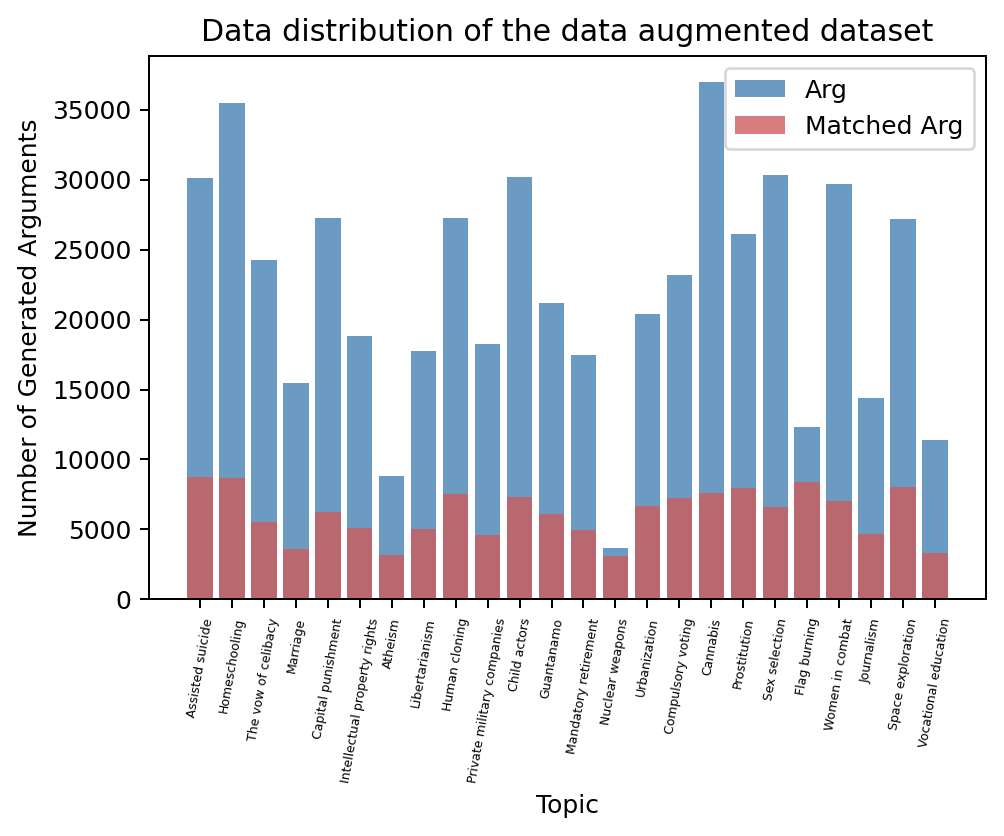

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
plt.figure(dpi=180)
# Build data
x_data = ['Assisted suicide','Homeschooling','The vow of celibacy','Marriage','Capital punishment','Intellectual property rights',
          'Atheism','Libertarianism','Human cloning','Private military companies','Child actors','Guantanamo','Mandatory retirement',
          'Nuclear weapons','Urbanization','Compulsory voting','Cannabis','Prostitution','Sex selection','Flag burning','Women in combat',
          'Journalism','Space exploration','Vocational education']
y_data = list(data['topic'].value_counts(sort=False))
y_data2 = list(data_unique['topic'].value_counts(sort=False))
# Drawing
plt.bar(x=x_data, height=y_data, label='Arg', color='steelblue', alpha=0.8)
plt.bar(x=x_data, height=y_data2, label='Matched Arg', color='indianred', alpha=0.8)
# Display of specific values on a bar chart, ha parameter controls horizontal alignment, va controls vertical alignment
#for x, y in enumerate(y_data):
#    plt.text(x, y + 100, '%s' % y, ha='center', va='top')
# Set title
plt.title('Data distribution of the data augmented dataset')
# Set names for both axes
plt.xlabel("Topic")
plt.ylabel("Number of Generated Arguments")
plt.xticks(fontsize=5)
plt.xticks(rotation=80)
# Show legend
plt.legend()
plt.show()
plt.savefig('./data_distribution')

In [ ]:
dataset_path ="/content/drive/MyDrive/Colab Notebooks/ArgumentSummarzation/"

evidence = pd.read_csv(dataset_path + "wikipedia_evidence_dataset_29429.csv")

evidence['Motion Text'].unique()

array(['We should legalize doping in sport',
       'We should protect endangered species',
       'Holocaust denial should be a criminal offence',
       'We should legalize polygamy', 'We should ban cosmetic surgery',
       'We should legalize prostitution',
       'We should abolish the three-strikes laws',
       'We should adopt libertarianism', 'We should legalize ivory trade',
       'We should abolish temporary employment',
       'Surrogacy should be banned',
       'We should further exploit green technology',
       'We should ban abortions', 'We should raise the retirement age',
       'We should ban lotteries',
       'We should further exploit geothermal energy',
       'We should ban targeted killing',
       'We should abolish the US Electoral College',
       'We should ban free newspapers',
       'We should lower the drinking age',
       'We should legalize insider trading',
       'We should ban alternative medicine',
       'We should subsidize public service bro